# Import libraries and data
## Preparing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\01 Basics of Machine Learning for Analysts\00 Data Sets'

In [4]:
df_scaled =  pd.read_csv(os.path.join(path, 'DataSet_scaled_trimmed.csv'), index_col = False)
df_scaled = df_scaled.drop(['DATE', 'MONTH'], axis=1)
df_scaled

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [5]:
df_pleasant =  pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)
df_pleasant =  df_pleasant.drop(['DATE'], axis=1)
df_pleasant

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split Data into Test and Train

In [6]:
X = df_scaled
y = df_pleasant

print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [7]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


# Create and run the Decision Tree

### 1st Run

[Text(0.3679765268264034, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.0645329487378914, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018396552792465302, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.008035179486120292, 0.8653846153846154, 'x[78] <= 0.233\ngini = 0.00

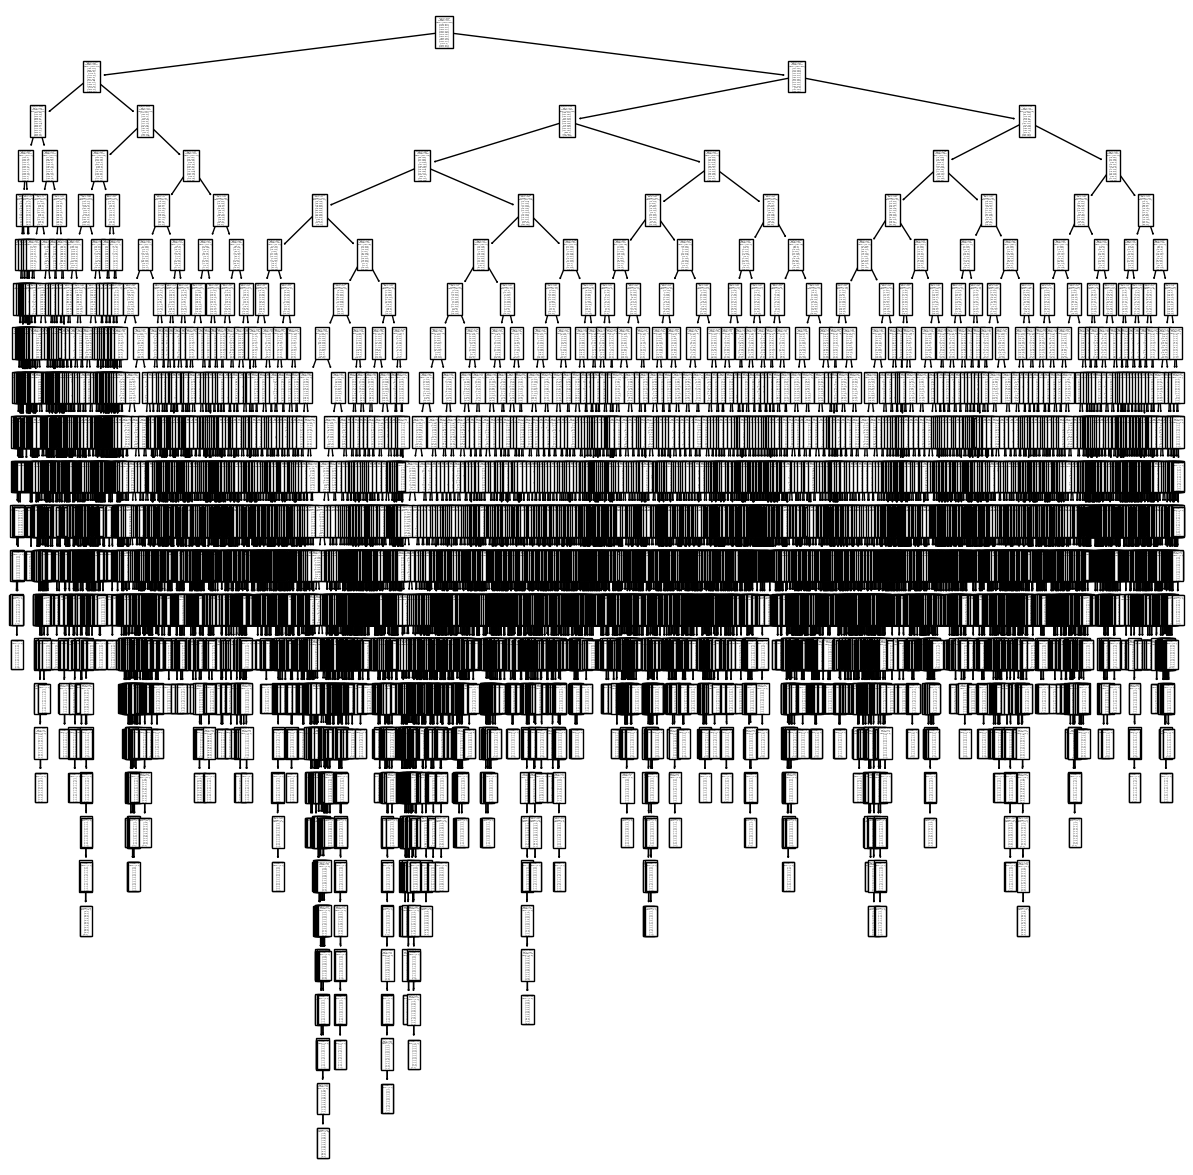

In [8]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [9]:
# What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6008595182355089


In [10]:
# What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.6336702683861973


array([[[4151,  187],
        [ 161, 1239]],

       [[3651,  125],
        [ 123, 1839]],

       [[3754,  146],
        [ 139, 1699]],

       [[4420,  217],
        [ 187,  914]],

       [[4478,   29],
        [  47, 1184]],

       [[4278,  292],
        [ 245,  923]],

       [[4667,  148],
        [ 133,  790]],

       [[4135,   60],
        [  49, 1494]],

       [[4326,  236],
        [ 184,  992]],

       [[3003,  165],
        [ 147, 2423]],

       [[4392,  154],
        [ 142, 1050]],

       [[4705,  174],
        [ 139,  720]],

       [[5738,    0],
        [   0,    0]],

       [[4508,  258],
        [ 273,  699]],

       [[5260,  202],
        [ 178,   98]]], dtype=int64)

### Confusion Matrices (Absolute)

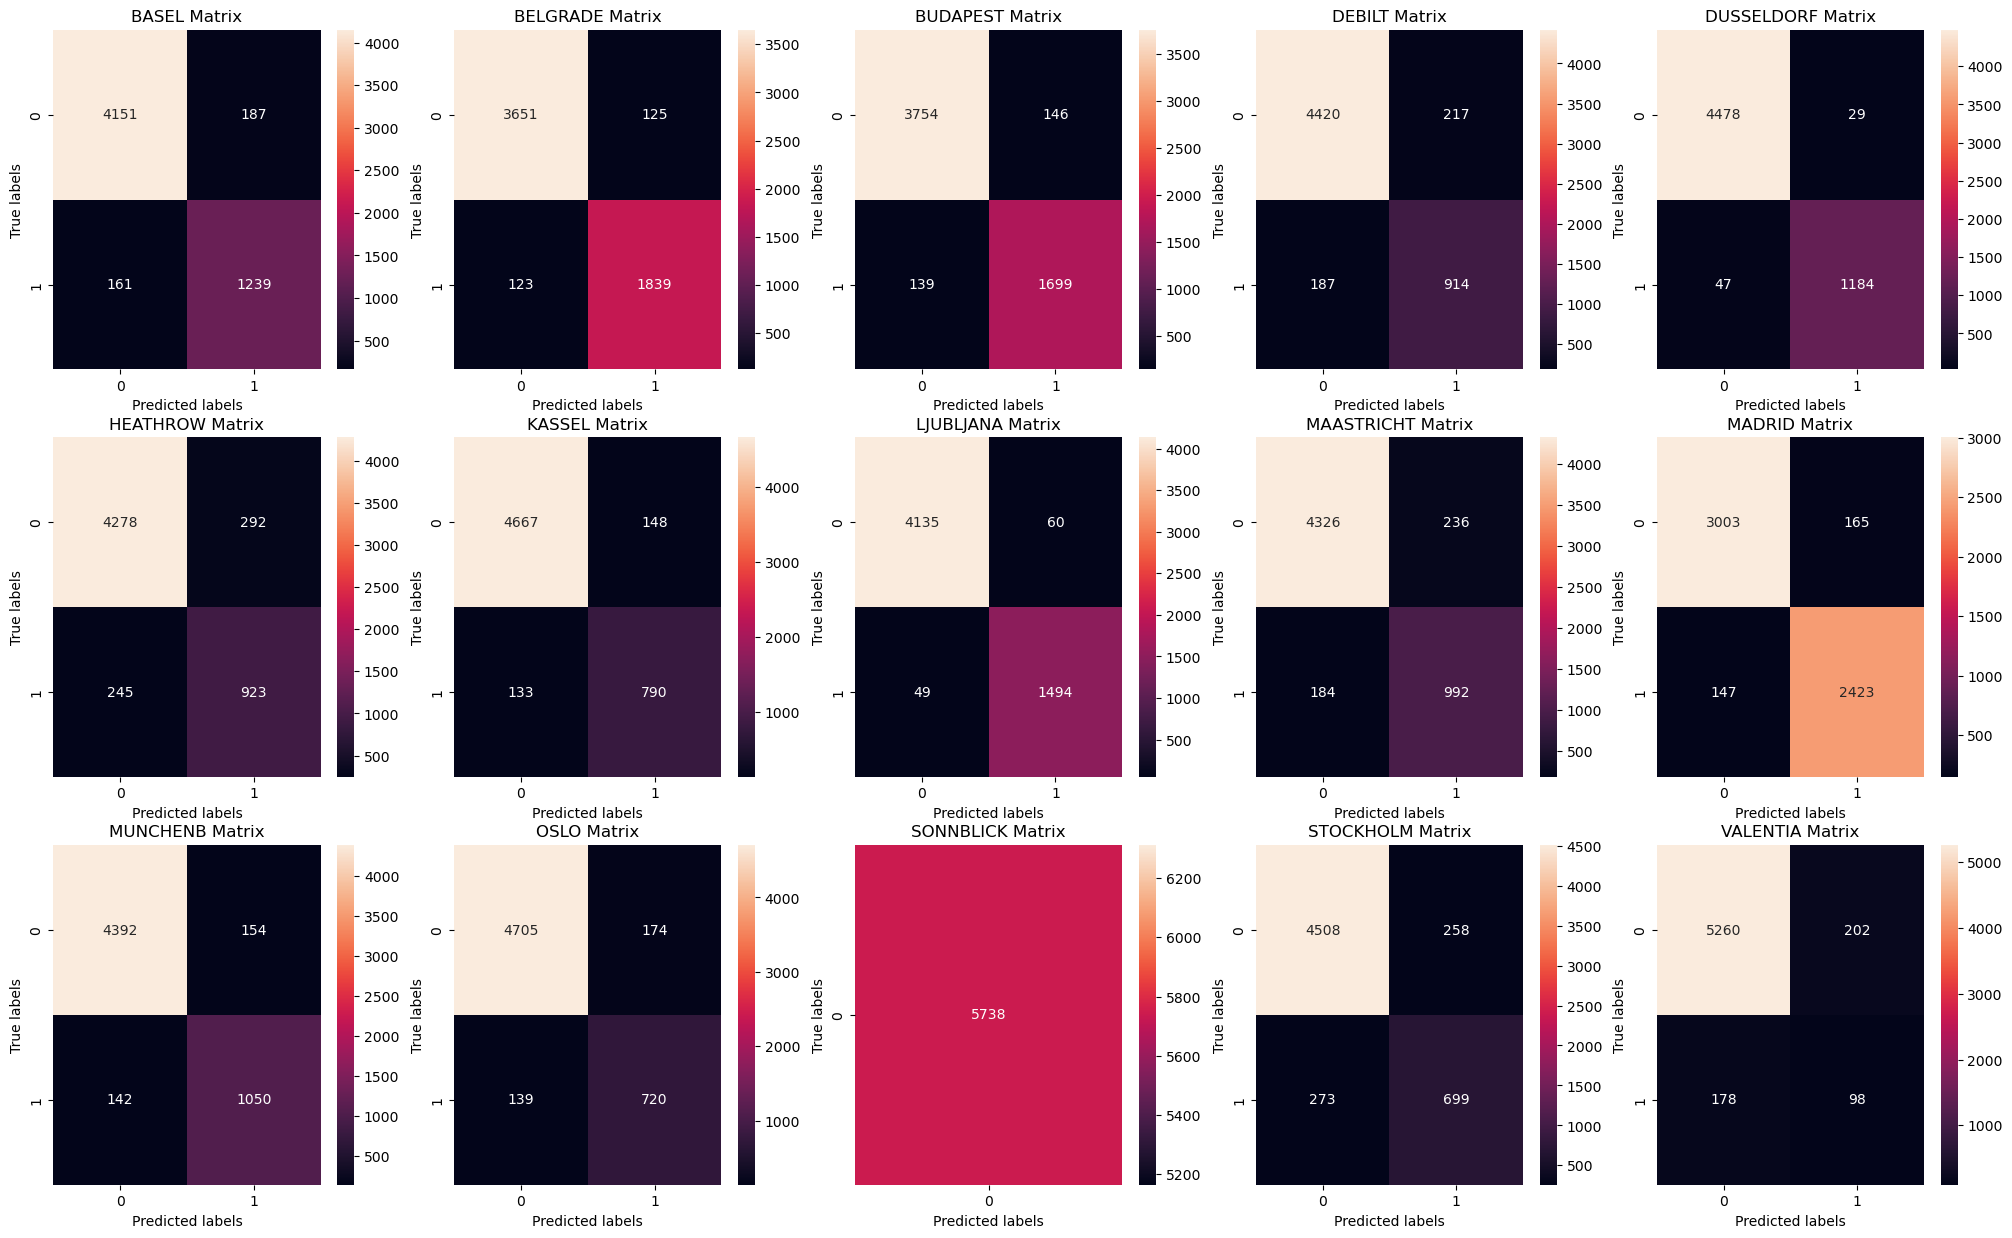

In [11]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Confusion Matrices (Percentages)

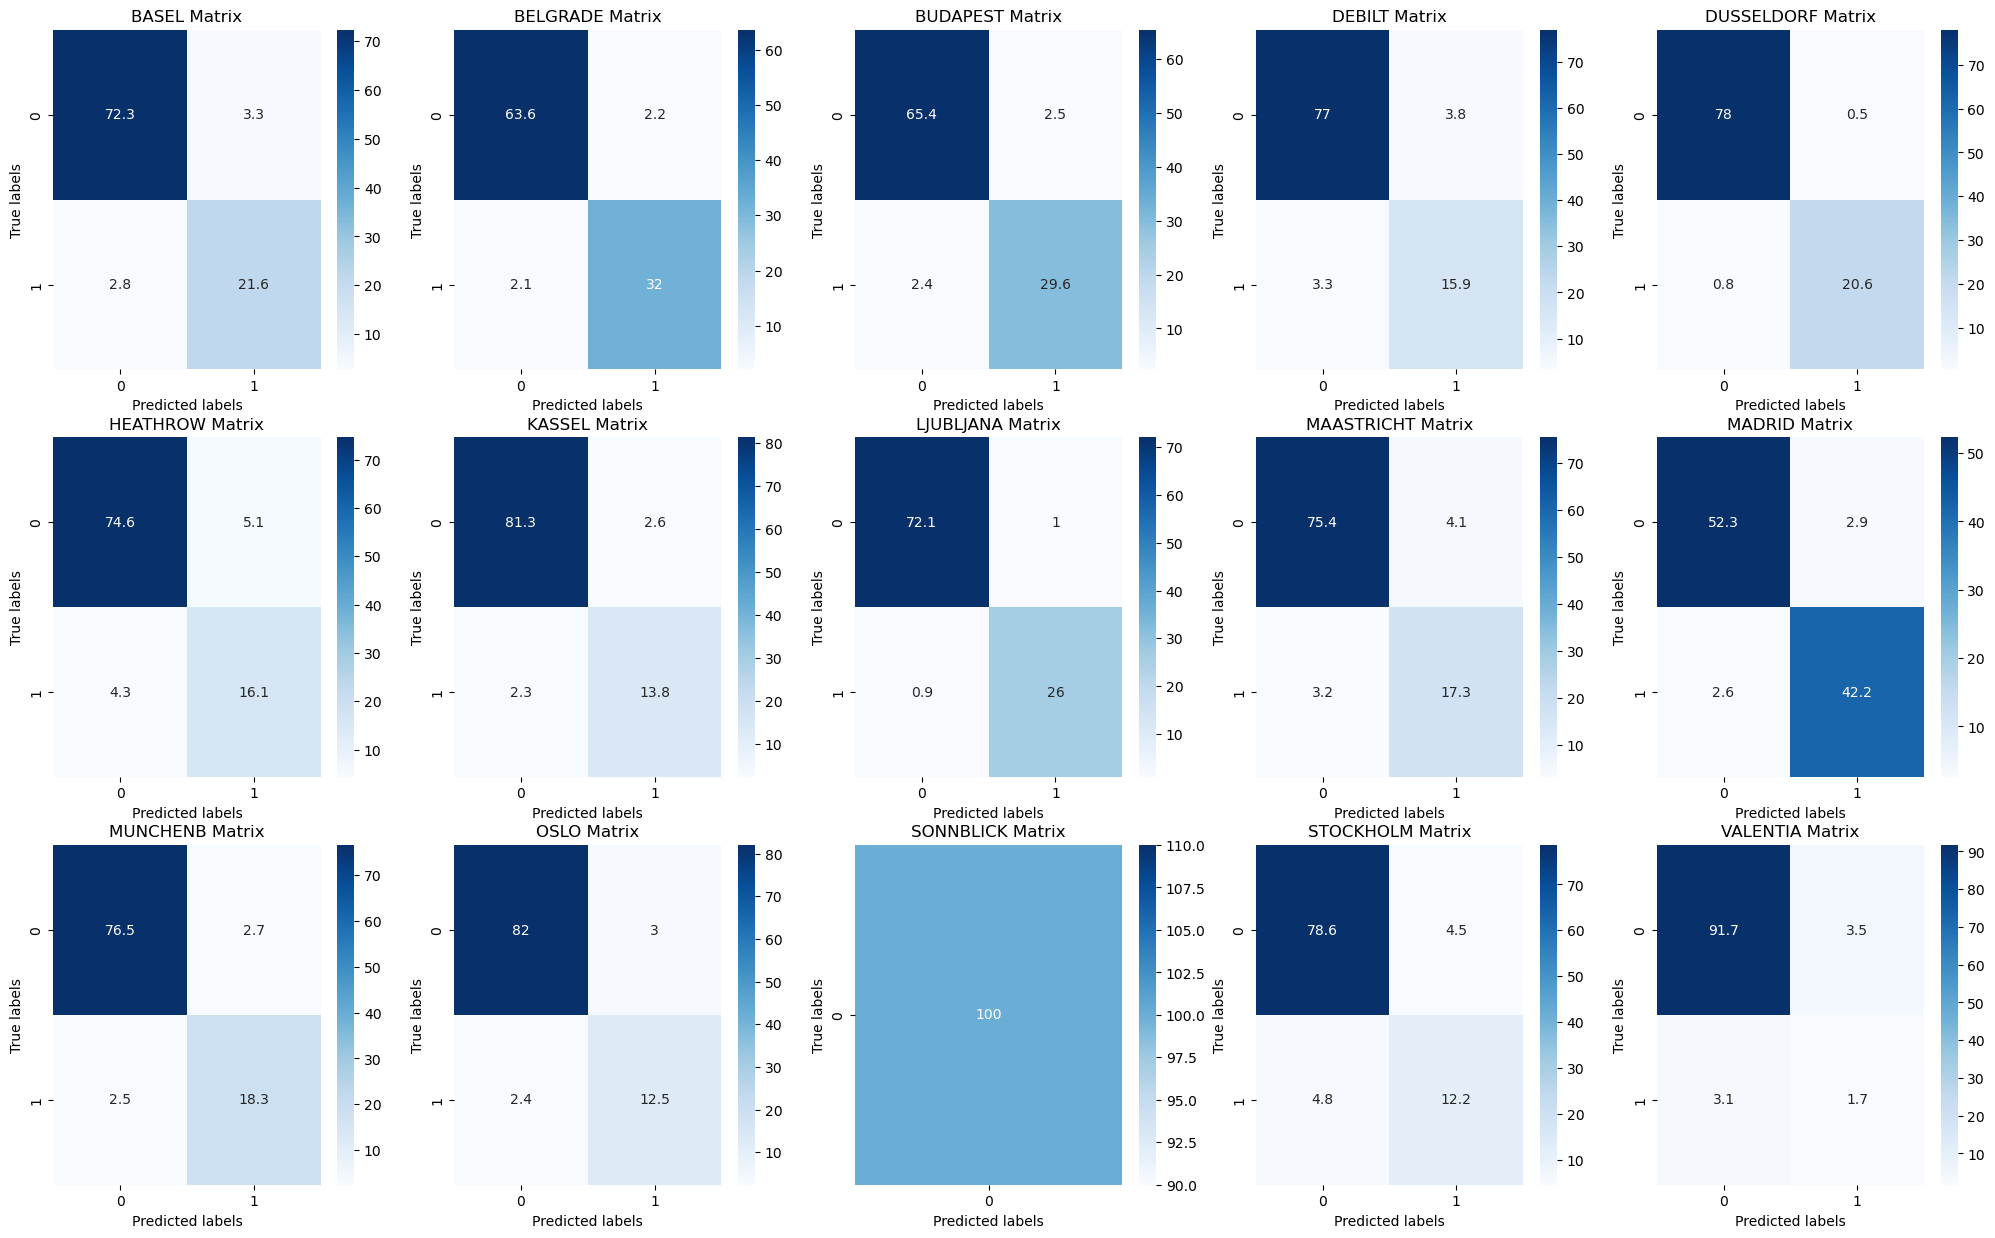

In [12]:
locations = list({x.split("_")[0] for x in df_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(np.round(100*cm/np.sum(cm), decimals=1), annot=True, fmt='g',  ax=ax[i,j], cmap='Blues');
        
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1